In [153]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.collections import PatchCollection
from matplotlib.patches import Rectangle
import numpy as np
import pandas as pd
from ipywidgets import interact
import ipywidgets as widgets
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D 

# Warm Up

Find the critical points and identify them as maximum or minimum values for 

- If $D > 0$ and $fxx(a, b) > 0$, then $f (a,b)$ is a local minimum.
- If $D > 0$ and $fxx(a, b) < 0$, then $f (a,b)$ is a local maximum.
- If $D < 0$, then $f$ has a saddle point at $(a, b)$.
-  If $D = 0$, the test is inconclusive.

$$f(x, y) = \sin(x + y) - \cos(x)$$

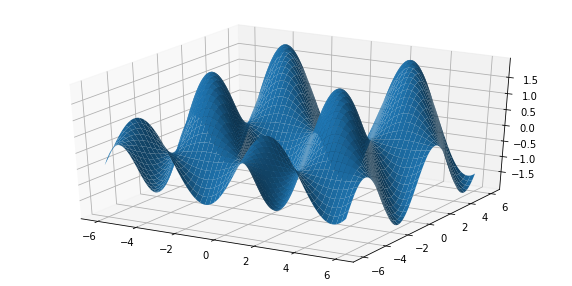

In [154]:
fig = plt.figure(figsize = (10, 5))
ax = fig.add_subplot(111, projection='3d')
def f(x, y): return np.sin(x + y) - np.cos(x)
x = np.linspace(-6, 6, 1000)
y = np.linspace(-6, 6, 1000)
X, Y = np.meshgrid(x, y)

ax.plot_surface(X, Y, f(X, Y))

### Review of Some Stats

In [155]:
def var_viz(sd): 
    x = np.random.normal(0, sd, 1000)
    plt.plot(x, np.zeros(len(x)), 'o', markeredgecolor=(0, 0, 0, 1), color = 'lightblue', alpha = 0.4)
    plt.xlim(-10, 10)
    plt.title(f'The variance of the data is: {np.var(x): .6f}')
    plt.show()

In [156]:
interact(var_viz, sd = widgets.FloatSlider(min = 0, max = 10, step = .1))

interactive(children=(FloatSlider(value=0.0, description='sd', max=10.0), Output()), _dom_classes=('widget-int…

<function __main__.var_viz(sd)>

### Variance and Covariance

$$Var(X) = \frac{1}{n}\sum_{i = 1}^n (x_i - \mu)^2$$

Depending on the context, we may be working with a discrete collection of data points or a continuous function $f$ that can describe a probability distribution of the data.  For example, we used the *normal distribution* to generate the data above.  

Taking an example where we set the mean of the data at zero and the standard deviation to three, we can visualize one such distribution as follows.

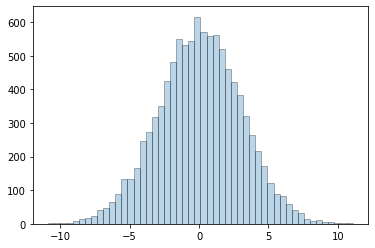

In [157]:
x = np.random.normal(0, 3, 10000)
plt.hist(x, edgecolor = 'black', alpha = 0.3, bins = 50);

It so happens we could describe this shape by a function in two variables -- the mean and standard deviation as follows:

$${\displaystyle f(x)={\frac {1}{\sigma {\sqrt {2\pi }}}}e^{-{\frac {1}{2}}\left({\frac {x-\mu }{\sigma }}\right)^{2}}}$$

In our example above, we have 

$$\sigma = 3 \quad \text{and} \quad \mu = 0$$

In [158]:
def f(x, mu, sigma):
    return (1/(sigma*np.sqrt(2*np.pi))*np.exp(-0.5*((x - mu)/sigma)**2))

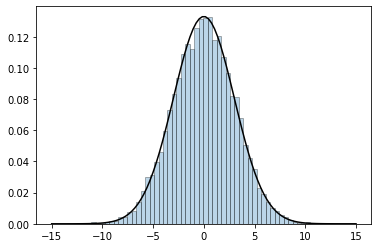

In [159]:
x = np.linspace(-15, 15, 100)
plt.plot(x, f(x, 0, 3), color = 'black')

data = np.random.normal(0, 3, 10000)
plt.hist(data, edgecolor = 'black', alpha = 0.3, bins = 50, density = True);

In [160]:
def normal_plotter(mu, sigma):
    x = np.linspace(-15, 15, 100)
    plt.plot(x, f(x, mu, sigma), color = 'black')

    data = np.random.normal(mu, sigma, 10000)
    plt.hist(data, edgecolor = 'black', alpha = 0.3, bins = 50, density = True)
    plt.xlim(-15, 15)
    plt.title('The Normal Distribution')
    plt.show();

In [161]:
interact(normal_plotter, mu = widgets.FloatSlider(min = -5, max = 5, step = 0.4),
                        sigma = widgets.FloatSlider(min = 1, max = 10, step = 0.1))

interactive(children=(FloatSlider(value=0.0, description='mu', max=5.0, min=-5.0, step=0.4), FloatSlider(value…

<function __main__.normal_plotter(mu, sigma)>

The continuous analogue of our variance formula involves integrating this *probability density function* $f(x)$ as follows:


$$\displaystyle \begin{aligned} \operatorname {Var} (X)=\sigma ^{2}&=\int _{\mathbb {R} }(x-\mu )^{2}f(x)\,dx\\[4pt]&=\int _{\mathbb {R} }x^{2}f(x)\,dx-2\mu \int _{\mathbb {R} }xf(x)\,dx+\int _{\mathbb {R} }\mu ^{2}f(x)\,dx\\[4pt]&=\int _{\mathbb {R} }x^{2}\,dF(x)-2\mu \int _{\mathbb {R} }x\,dF(x)+\mu ^{2}\int _{\mathbb {R} }\,dF(x)\\[4pt]&=\int _{\mathbb {R} }x^{2}\,dF(x)-2\mu \cdot \mu +\mu ^{2}\cdot 1\\[4pt]&=\int _{\mathbb {R} }x^{2}\,dF(x)-\mu ^{2},\end{aligned}$$

where $F$ is the associated *cumulative distribution function*, or more explicitly.

$$\displaystyle \operatorname {Var} (X)=\int _{-\infty }^{+\infty }x^{2}f(x)\,dx-\mu ^{2} $$

### Covariance

Suppose now we have two sets of data $x, y$ that we make to be a linear association with gaussian noise.



In [162]:
x = np.linspace(0, 10, 20)
def f(x): return 3*x + np.random.normal(0, 3, 20)

Text(0.5, 1.0, '$x$ vs. $y$')

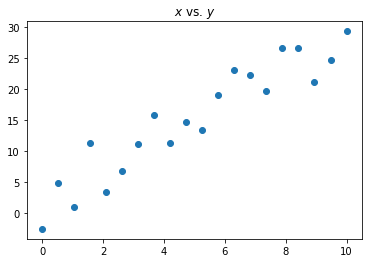

In [163]:
plt.scatter(x, f(x))
plt.title('$x$ vs. $y$')

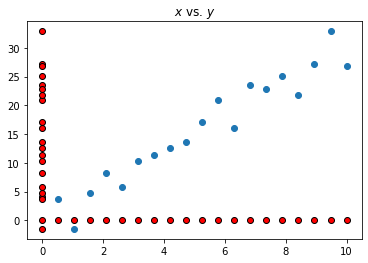

In [164]:
np.random.seed(10)
x = np.linspace(0, 10, 20)
def f(x): return 3*x + np.random.normal(0, 3, 20, )
y = f(x)
plt.scatter(x, y)
plt.scatter(np.zeros(len(x)), y, color = 'red', edgecolors = 'black')
plt.scatter(x, np.zeros(len(x)), color = 'red', edgecolors = 'black')
plt.title('$x$ vs. $y$');

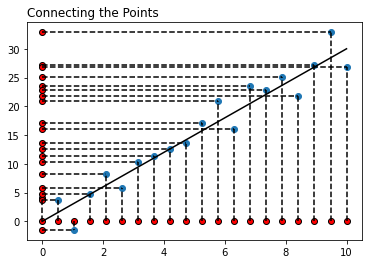

In [165]:
np.random.seed(10)
x = np.linspace(0, 10, 20)
def f(x): return 3*x + np.random.normal(0, 3, 20)
def lbf(x): return 3*x
y = f(x)
plt.scatter(x, y)
plt.plot(x, lbf(x), color = 'black')
plt.scatter(np.zeros(len(x)), y, color = 'red', edgecolors = 'black')
plt.scatter(x, np.zeros(len(x)), color = 'red', edgecolors = 'black')
plt.title('Connecting the Points', loc = 'left');
for a,b in zip(x, y):
    plt.plot([a, a], [0, b], linestyle = '--', color = 'black')
    plt.plot([0, a], [b, b], linestyle = '--', color = 'black')

In [166]:
def var_experiment(sd):
    np.random.seed(10)
    x = np.linspace(0, 10, 20)
    def f(x): return 3*x + np.random.normal(0, sd, 20)
    def lbf(x): return 3*x
    y = f(x)
    plt.scatter(x, y)
    plt.plot(x, lbf(x), color = 'black')
    plt.scatter(np.zeros(len(x)), y, color = 'red', edgecolors = 'black')
    plt.scatter(x, np.zeros(len(x)), color = 'red', edgecolors = 'black')
    plt.title('Connecting the Points', loc = 'left');
    for a,b in zip(x, y):
        plt.plot([a, a], [0, b], linestyle = '--', color = 'black')
        plt.plot([0, a], [b, b], linestyle = '--', color = 'black')

In [167]:
interact(var_experiment, 
         sd = widgets.FloatSlider(0, min = 0, max = 5, step = 0.1))

interactive(children=(FloatSlider(value=0.0, description='sd', max=5.0), Output()), _dom_classes=('widget-inte…

<function __main__.var_experiment(sd)>

Recall our definition of variance in 1-dimension and now consider our example in 2-dimensions:

$$\displaystyle \operatorname {Var} (X)={\frac {1}{n}}\sum _{i=1}^{n}(x_{i}-\mu )^{2}$$

$$\displaystyle \operatorname {cov} (X,Y)={\frac {1}{n}}\sum _{i=1}^{n}(x_{i}-\bar{x})(y_{i}-\bar{y})$$

In [168]:
def covar_experiment(sd):
    np.random.seed(10)
    x = np.linspace(0, 10, 20)
    def f(x): return 3*x + np.random.normal(0, sd, 20)
    def lbf(x): return 3*x
    y = f(x)
    plt.scatter(x, y)
    plt.plot(x, lbf(x), color = 'black')
    plt.scatter(np.zeros(len(x)), y, color = 'red', edgecolors = 'black')
    plt.scatter(x, np.zeros(len(x)), color = 'red', edgecolors = 'black')
    plt.title(f'Covariance of x with y: {np.cov(x, y)[0,1]: .5f}', loc = 'left');
    for a,b in zip(x, y):
        plt.plot([a, a], [0, b], linestyle = '--', color = 'black')
        plt.plot([0, a], [b, b], linestyle = '--', color = 'black')

In [169]:
interact(covar_experiment, 
         sd = widgets.FloatSlider(0, min = 0, max = 5, step = 0.1))

interactive(children=(FloatSlider(value=0.0, description='sd', max=5.0), Output()), _dom_classes=('widget-inte…

<function __main__.covar_experiment(sd)>

In [170]:
X = np.stack((x, y), axis = 0)

In [171]:
pd.DataFrame(np.cov(X, ddof = 0), columns = ['x', 'y'], index = ['x', 'y'])

,x,y
x,9.210526,27.180693
y,27.180693,86.472521


In [172]:
x_bar = np.mean(x)
y_bar = np.mean(y)
xs = [xi-x_bar for xi in x]
ys = [yi-y_bar for yi in y]
np.mean([x*y for x,y in zip(xs, ys)])

27.18069311256793

### $r^2$ and Pearson's Correlation Coefficient

$$\displaystyle \rho _{X,Y}={\frac {\operatorname {cov} (X,Y)}{\sigma _{X}\sigma _{Y}}}$$
 
where:

- $\operatorname {cov}$: is the covariance

- $\sigma _{X}$ is the standard deviation of $\displaystyle X$

- $\sigma _{Y}$  is the standard deviation of $\displaystyle Y$.

 

 



**NOTE!!**: Not quite our coefficient determined by deriving the line of best fit but you should note how we are able to get a sense of the variation that is explained by considering Pearson's $r$.

$$\displaystyle y_{i}=\alpha +\beta x_{i}+\varepsilon _{i}$$

The least squares estimates in this case are given by simple formulas

$$\beta = \frac{\text{Cov} [x, y]}{\text{Var} [x]}$$

and 

$$\alpha = \bar{y} - \beta\bar{x}$$

In [173]:
def pearsons_experiment(m, sd):
    np.random.seed(10)
    x = np.linspace(0, 10, 20)
    def f(x): return m*x + np.random.normal(0, sd, 20)
    def lbf(x): return m*x
    y = f(x)
    rects = []
    fig, ax = plt.subplots(figsize = (10, 6))
    ax.scatter(x, y, color = 'black')
    ax.plot(x, lbf(x), color = 'black')
    xbar = np.mean(x)
    ybar = np.mean(y)
    for a,b in zip(x,y):
        rect = Rectangle((a, b), xbar - a, ybar - b)
        rects.append(rect)
    patches = PatchCollection(rects, facecolor = 'red', linewidth = 4, edgecolor = 'black',
                             alpha = 0.1)
    ax.add_collection(patches)
    ax.set_title(f'Pearsons $r^2$: {np.corrcoef(x, y)[0,1]: .5f}')

In [174]:
interact(pearsons_experiment, 
         m = widgets.FloatSlider(0.01, min = -5, max = 5, step = 0.21),
        sd = widgets.FloatSlider(min = 0, max = 15, step = 0.2))

interactive(children=(FloatSlider(value=0.01, description='m', max=5.0, min=-5.0, step=0.21), FloatSlider(valu…

<function __main__.pearsons_experiment(m, sd)>

### Example

The data below represents advertising spending in different markets and the corresponding sales.

In [175]:
ads = pd.read_csv('ads.csv', index_col = 0)

In [176]:
ads.head()

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


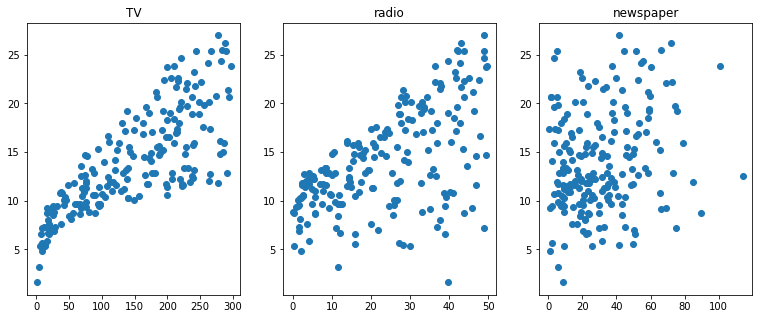

In [177]:
fig, ax = plt.subplots(1, 3, figsize = (13, 5))
x1 = ads['TV']
x2 = ads['radio']
x3 = ads['newspaper']
y = ads['sales']
ax[0].scatter(x1, y)
ax[0].set_title('TV')
ax[1].scatter(x2, y)
ax[1].set_title('radio')
ax[2].scatter(x3, y)
ax[2].set_title('newspaper');

In [178]:
#correlation
pd.DataFrame(ads.corr())

,TV,radio,newspaper,sales
TV,1.000000,0.054809,0.056648,0.782224
radio,0.054809,1.000000,0.354104,0.576223
newspaper,0.056648,0.354104,1.000000,0.228299
sales,0.782224,0.576223,0.228299,1.000000


In [179]:
#covariance
pd.DataFrame(ads.cov())

,TV,radio,newspaper,sales
TV,7370.949893,69.862492,105.919452,350.390195
radio,69.862492,220.427743,114.496979,44.635688
newspaper,105.919452,114.496979,474.308326,25.941392
sales,350.390195,44.635688,25.941392,27.221853


In [180]:
from mpl_toolkits.mplot3d import Axes3D 

In [181]:
def scatter_exp(z, d):
    fig = plt.figure(figsize = (10, 5))
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(ads['TV'], ads['radio'], ads['sales'])
    ax.set_xlabel('TV')
    ax.set_ylabel('radio')
    ax.set_zlabel('sales')
    ax.view_init(z, d)
    #ax.set_axis_off()

In [182]:
interact(scatter_exp,
        z = widgets.IntSlider(min = 0, max = 360),
        d = widgets.IntSlider(min = 0, max = 360))

interactive(children=(IntSlider(value=0, description='z', max=360), IntSlider(value=0, description='d', max=36…

<function __main__.scatter_exp(z, d)>

In [183]:
from sklearn.linear_model import LinearRegression

In [184]:
X = ads[['TV', 'radio']]
y = ads['sales']
lr = LinearRegression()
lr.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [185]:
lr.coef_

array([0.04575482, 0.18799423])

In [186]:
lr.intercept_

2.921099912405138

In [187]:
#r2 score
lr.score(X, y)

0.8971942610828956

### Differential Equations

Consider

$$\frac{df}{dx} = x^2$$

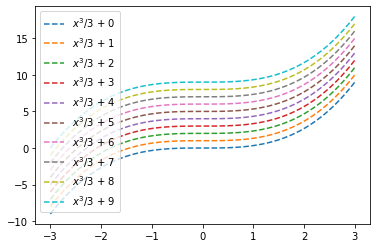

In [188]:
x = np.linspace(-3, 3, 100)
def f(x, c): return x**3/3 + c
for i in range(10):
    plt.plot(x, f(x, i), '--', label = f'$x^3/3$ + {i}')
plt.legend()

Consider

$$\frac{df}{dx} = x^2 \quad \text{and} \quad f(2) = 3$$

In [189]:
def dfdx(x): return x**2
def tan_line(x, x0, y0): return y0 + dfdx(x0)*(x - x0)

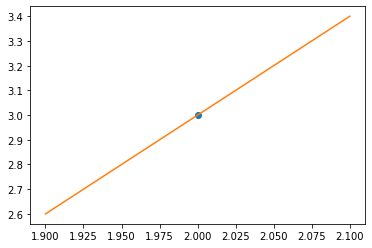

In [190]:
plt.plot(2, 3, 'o')
x = np.linspace(1.9, 2.1, 10)
plt.plot(x, tan_line(x, 2, 3))

In [191]:
x0 = 2
y0 = 3
dx = 0.05
xnext = 2 + dx
ynext = tan_line(xnext, x0, y0) 

In [192]:
xnext

2.05

In [193]:
ynext

3.1999999999999993

(1.9, 2.1)

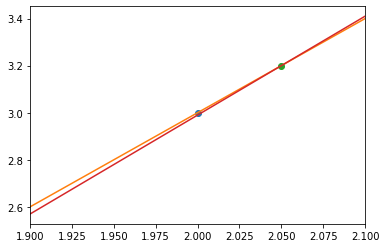

In [194]:
plt.plot(2, 3, 'o')
x = np.linspace(1.9, 2.1, 10)
plt.plot(x, tan_line(x, 2, 3))
plt.plot(2.05, 3.19999, 'o')
plt.plot(x, tan_line(x, 2.05, 3.19999))
plt.xlim(1.9, 2.1)

In [195]:
def dfdx(x): return x**2
x0 = 0
y0 = 3
dx = 0.05
xnext = x0 + dx
ynext = y0 + dfdx(x0)*dx

In [196]:
ynext

3.0

In [197]:
ys = [3]
xs = [0]
for t in range(10):
    ys.append(ys[-1] + dfdx(xs[-1])*dx)
    xs.append(xs[-1] + dx)

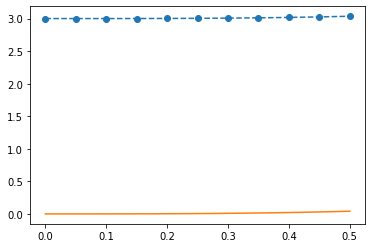

In [198]:
plt.plot(xs, ys, '--o')
x = np.linspace(0, 0.5, 100)
plt.plot(x, x**3/3)

<script>
  (function(i,s,o,g,r,a,m){i['GoogleAnalyticsObject']=r;i[r]=i[r]||function(){
  (i[r].q=i[r].q||[]).push(arguments)},i[r].l=1*new Date();a=s.createElement(o),
  m=s.getElementsByTagName(o)[0];a.async=1;a.src=g;m.parentNode.insertBefore(a,m)
  })(window,document,'script','https://www.google-analytics.com/analytics.js','ga');

  ga('create', 'UA-50838873-3', 'auto');
  ga('send', 'pageview');

</script>

In [199]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import sympy as sy
from scipy.integrate import odeint
size = (12, 9)
from ipywidgets import interact, widgets, fixed
from math import atan2

# Population Models

A simple example of a model involving a differential equation could be the basic additive population growth model.  Here, suppose we have a constant rate of change $k$.  As a differential equation we would have:

$$\frac{dP}{dt} = k$$

We are familiar with the solution 

$$P(t) = kt + c$$

In this notebook, we want to add complexity to this model and explore the results.  Obviously, assuming a constant rate of change in a population model is a fairly naive assumption.  Regardless, let's quickly revisit our methods for visualizing and solving a differential equation expressed in this form.





In [200]:
x, k, t, P = sy.symbols('x k t P')

In [201]:
def dp_dt(x,k):
    return k

In [202]:
sy.integrate(dp_dt(x,k), t)

k*t

## Exponential Growth

Last notebook, we saw the basic population model expressed as a differential equation.  Here, we should recall our earlier work with discrete sequences and the passage to the limit that determines the change from $\Delta P$ to $dP$.  We will rely heavily on this idea when modeling with differential equations.  For the simple exponential population model, as a differential equation we have

$$\frac{dP}{dt} = rP$$

whereas in the discrete case we have

$$\frac{\Delta P}{\Delta t} = rP \quad or \quad \Delta P = rP\Delta t$$

Returning to a basic example, suppose we know a population has size $P = 100$ at time $t=0$.  The population grows at a 0.24% growth rate.  If we consider this in terms of our abover relationship as a way to approximate solutions every $\Delta t = 0.1$, we get the following populations $p_i$.

$$p_0 = 100$$

$$p_1 = 100 + 0.0024(100)(0.1) \quad \text{or} \quad p_0(1+r)\Delta t$$

**Problem**: A certain city had a population of 25,000 and a growth rate of $r = 1.8%$.  Assume that its population will continue to grow exponentially at a constant rate, what population can its city planners expect in the year 2000?


In [203]:
r = 0.018
p0 = 25000
dt = 1

P = [p0]
for i in range(10):
    next = P[i]*(1 + r)*dt
    P.append(next)

In [204]:
P

[25000,
 25450.0,
 25908.100000000002,
 26374.4458,
 26849.185824400003,
 27332.471169239205,
 27824.455650285512,
 28325.295851990653,
 28835.151177326487,
 29354.183898518364,
 29882.559208691695]

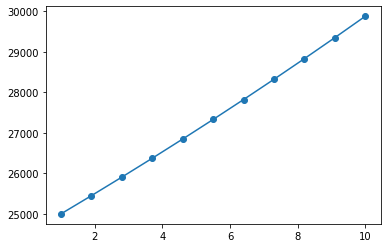

In [205]:
plt.figure()
plt.plot(np.linspace(1,10,11), P, '-o')

We are interested in the effect of varying some of the parameters of the differential equation.  Here, we really only have two, the inital population and the growth rate.  Let's just vary the growth rate and describe the change in the resulting solutions.

In [206]:
def exp_grow(p0, r):
    P = [p0]
    for i in range(10):
        next = p0*r**i
        P.append(next)
    plt.figure()
    plt.plot(P, '-o')
        
interact(exp_grow, r=(1.00,2.0,0.01), p0 = (100,500,25));

interactive(children=(IntSlider(value=300, description='p0', max=500, min=100, step=25), FloatSlider(value=1.5…

### The Logistic Differential Equation

The logistic equation was introduced by Pierre-Francois Verhulst in a discussion on the United States population growth.  In the middle of the 19th century, the United States was still expanding, and the population had followed exponential growth.  This could not continue however, as "the difficulty of finding good land has begun to make itself felt."



*the population tends to grow in geometric progression while the production of food follows a more or less arithmetic progression* --Verhulst 1845

This translates mathematically to the rate of births against those of deaths as a linear rate of change.  We can examine this through an example.  


Suppose we have a fish population that will stop growing at a population of 50,000.  We also know that when the population is 10,000, the population doubles.  Accordingly, if we plot population against growth rate we have two points $(10,000, 2)$ and $(50,000, 1)$.  We assume this is linear, and have the equation:

$$r = 2 - 0.000025(p-10,000)$$

Text(0.5, 1.0, 'A linear change in growth rate')

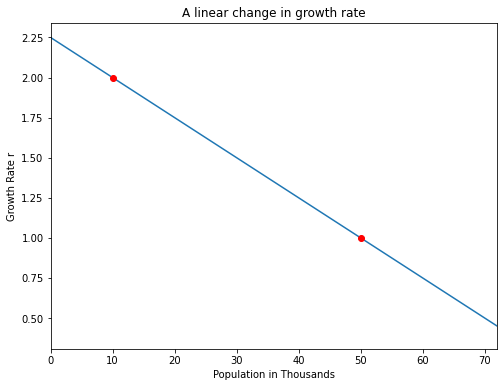

In [207]:
plt.figure(figsize=(8,6))
p = np.linspace(0,74,2000)
r = 2.25 - .025*p
plt.plot(p,r)
plt.plot(50,1,'ro')
plt.plot(10,2,'ro')
plt.xlim(0,72)
plt.ylabel('Growth Rate r')
plt.xlabel('Population in Thousands')
plt.title('A linear change in growth rate')

Now we want to find some values.  We can approximate these values using the earlier general population model.  In this situation we end up with:

$$p_{n+1} = r * p_n$$

$$p_{n+1} = (2.25 - .000025p_n)p_n$$

We will define a function to generate successive values of the sequence.  

In [208]:
def logistic_example(N=100, x0 = 1000):
    x = np.zeros(N)
    x[0] = x0
    for n in range(N-1):
        x[n+1] = (2.25 - 0.000025*x[n])*x[n]
    return x

x = logistic_example(N=100, x0 = 1000)

Text(0.5, 1.0, 'Logistic Fish Population')

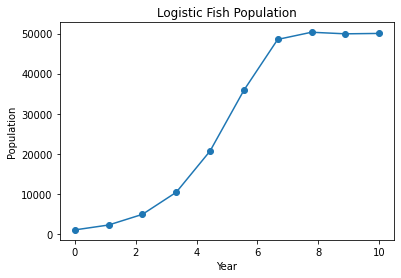

In [209]:
n = np.linspace(0,10,10)
plt.figure()
plt.plot(n,x[:10],marker='o')
plt.xlabel('Year')
plt.ylabel('Population')
plt.title('Logistic Fish Population')

In [210]:
def plot_logistic(i,x):
    plt.figure(figsize=(9,6))
    plt.plot(x[:i],'-ok', linewidth=2)
    plt.ylim(0,60000); plt.xlim(0,len(x))
    plt.xlabel('r'); plt.ylabel('x')
    plt.xlabel('Year')
    plt.ylabel('Population')
    plt.title('Logistic Fish Population')

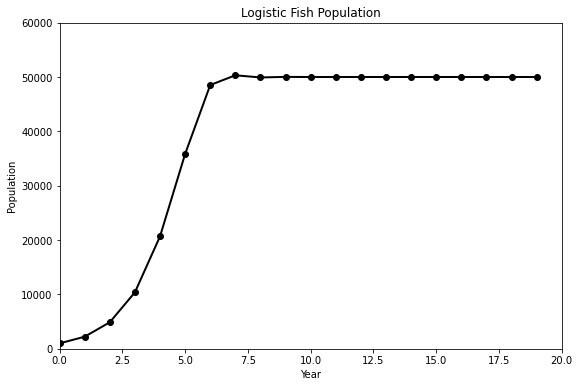

In [211]:
x = logistic_example(N=20)
plot_logistic(len(x), x)

### Experimenting with different rates

In general, we are dealing with the recurrence relationship

$$x_{n+1} = rx_n(1-x_n)$$

We've seen what happened in the fish population with a certain rate. Now we would like to see some other behavior by playing with values of $r$.

In [212]:
def logistic_example2(r=1.0, N=100, x0 = 0.6):
    x = np.zeros(N)
    x[0] = x0
    for n in range(N-1):
        x[n+1] = r*x[n]*(1. - x[n])
    return x

In [213]:
c = logistic_example2(r=1.0, N=30)
print(c[:10])

[0.6        0.24       0.1824     0.14913024 0.12689041 0.11078923
 0.09851498 0.08880978 0.0809226  0.07437413]


In [214]:
def plot_logistic2(i,x):
    plt.figure(figsize=(9,5))
    plt.plot(c[:i], '-ok', linewidth=2)

In [215]:
interact(plot_logistic2, i = widgets.IntSlider(min=0, max=len(c), step=1, value=0), x=fixed(x));

interactive(children=(IntSlider(value=0, description='i', max=30), Output()), _dom_classes=('widget-interact',…

#### Changing r

We can see some different kinds of behavior depending on altering the parameters $r$ and $x_0$.  Three things may happen.  Recall our equation:

$$x_{n+1} = x_n(1-x_n)$$

1. The values of $x_n$ get closer and closer to some limit value $x_\infty$ as $n \to \infty$.
2. The values of $x_n$ oscillate periodically among two or more values, repeating those values forever.
3. The values $x_n$ get larger and larger without bound.

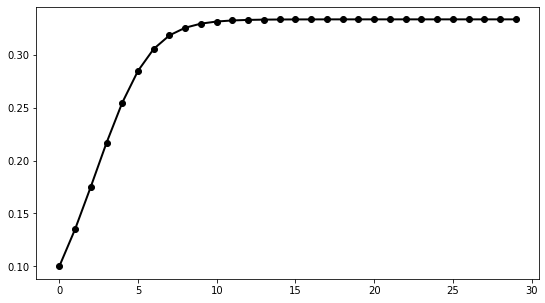

In [216]:
x = logistic_example2(r=1.5,N=30,x0=1./10)
def plot_logistic2(i,x):
    plt.figure(figsize=(9,5))
    plt.plot(x[:i], '-ok', linewidth=2)
plot_logistic2(len(x),x)

### Exploration

Playing with the sliders below, answer the following:

1. For what values of $r$ does $x_n \to 0$?
2. What happens for slightly bigger values of $r$?
3. Can you find values of $r$ that generate periodic orbits (i.e., situation 2 from above list)?
4. How many different points are visited in the periodic case?
5. What happens for even bigger values of $r$?
6. Make sure to try the value $r = 3.83$. What do you observe?

In [217]:
def logistic(r=1.0, N = 100, x0=0.2):
    x = np.zeros(N)
    x[0] = x0
    for n in range(N-1):
        x[n+1] = r * x[n] * (1. - x[n])
    plt.figure(figsize=size)
    ax1 = plt.subplot2grid((1,8), (0,0), colspan=7)
    ax2 = plt.subplot2grid((1,8), (0,7), colspan=1)
    
    ax1.plot(x, '-ok', linewidth=2)
    ax1.set_ylim(0,1)
    n = int(round(N/5))
    ax2.plot([0]*n,x[-n:],'or',markersize=10,alpha=0.1)
    ax2.set_ylim(0,1)
    ax2.axis('off')
    ax1.set_xlabel('r'); ax1.set_ylabel('x')
    
interact(logistic,r=(0,4,0.01),x0=(0.01,1,0.1));

interactive(children=(FloatSlider(value=1.0, description='r', max=4.0, step=0.01), IntSlider(value=100, descri…

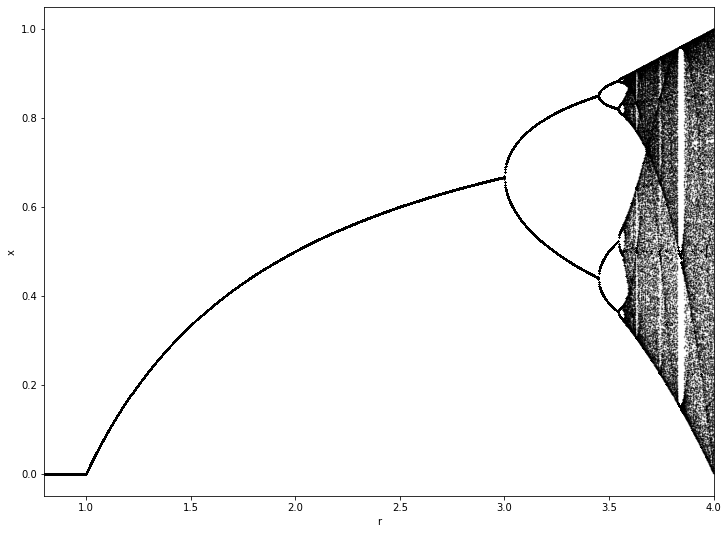

In [44]:
def bifurcation_diagram(r=(0.8,4),N=2000,k=2000,m=200,x0=0.2):
    """
        r: Pair of numbers (rmin,rmax) indicating parameter range
        k: Number of samples in r
        N: Number of iterations per sequence
        m: keep just the last m iterates
    """
    x = np.zeros((k,N))
    vals = np.zeros((k,m))
    rs = np.linspace(r[0],r[1],k)
    x[:,0] = x0
    for n in range(N-1):
        x[:,n+1] = rs * x[:,n] * (1. - x[:,n])
    return rs, x[:,-m:]

plotargs = {'markersize':0.5, 'alpha':0.4}
rs, vals = bifurcation_diagram()
plt.figure(figsize=size)   
plt.plot(rs,vals,'ok',**plotargs);
plt.xlim(rs.min(),rs.max());
plt.xlabel('r'); plt.ylabel('x');

### Solving the Differential Equation

### The Gaussian as Differential Equation